# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
# reading the CSV file into pandas dataframe
cancer_df = pd.read_csv("breast-cancer-wisconsin-data.csv")
cancer_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [4]:
#ID is dropped because as it is not neccesary
cancer_df = cancer_df.drop('ID', axis=1)

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [5]:
cancer_df.dtypes

ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [6]:
cancer_df.shape

(699, 10)

In [7]:
cancer_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [8]:
# We could see "?" values in column, this should be removed from data set
cancer_df.isnull().any()
# Check for missing value in any other column

ClumpThickness                 False
Cell Size                      False
Cell Shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Normal Nucleoli                False
Bland Chromatin                False
Mitoses                        False
Class                          False
dtype: bool

In [9]:
# No missing values found. So let us try to remove ? from bare nuclei column
# Get count of rows having ?
cancer_df.loc[cancer_df['Bare Nuclei'] == "?"].shape

(16, 10)

In [10]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [11]:
cancer_df = cancer_df.replace('?', np.nan)
cancer_df[cancer_df.isnull().any(axis=1)]

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,8,4,5,1,2,NaN,7,3,1,4
40,6,6,6,9,6,NaN,7,8,1,2
139,1,1,1,1,1,NaN,2,1,1,2
145,1,1,3,1,2,NaN,2,1,1,2
158,1,1,2,1,3,NaN,1,1,1,2
164,5,1,1,1,2,NaN,3,1,1,2
235,3,1,4,1,2,NaN,3,1,1,2
249,3,1,1,1,2,NaN,3,1,1,2
275,3,1,3,1,2,NaN,2,1,1,2
292,8,8,8,1,2,NaN,6,10,1,4


In [12]:
cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].astype('float64')

In [13]:
#replacing the missing values with median value
cancer_df = cancer_df.apply(lambda x: x.fillna(x.median()),axis=0) 
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null float64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [14]:
cancer_df.duplicated().count()

699

In [15]:
cancer_df.drop_duplicates(inplace=True)
cancer_df.shape

(457, 10)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


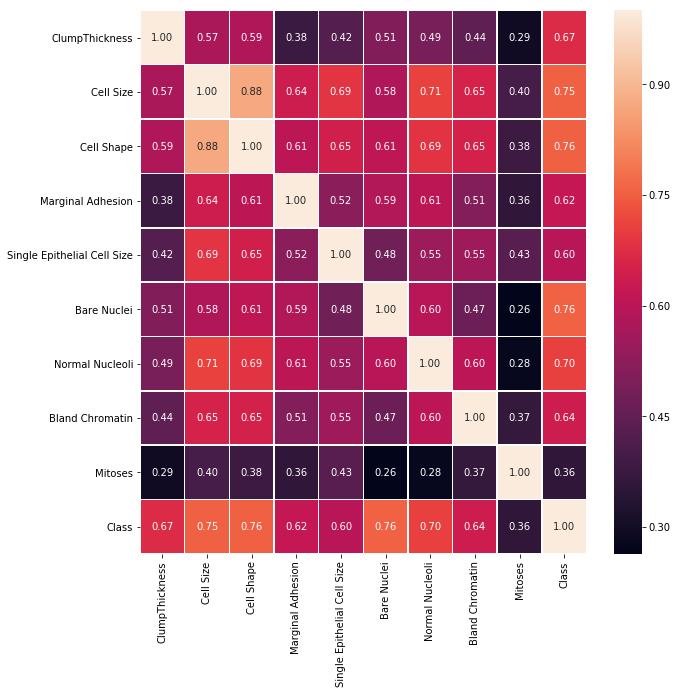

In [16]:
# Check for correlation of variable
cancer_corr = cancer_df.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cancer_corr,annot=True, linewidth=.5, fmt='.2f' , ax=ax)

In [17]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [18]:
#Let us check for pair plots

C:\Users\rames\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rames\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


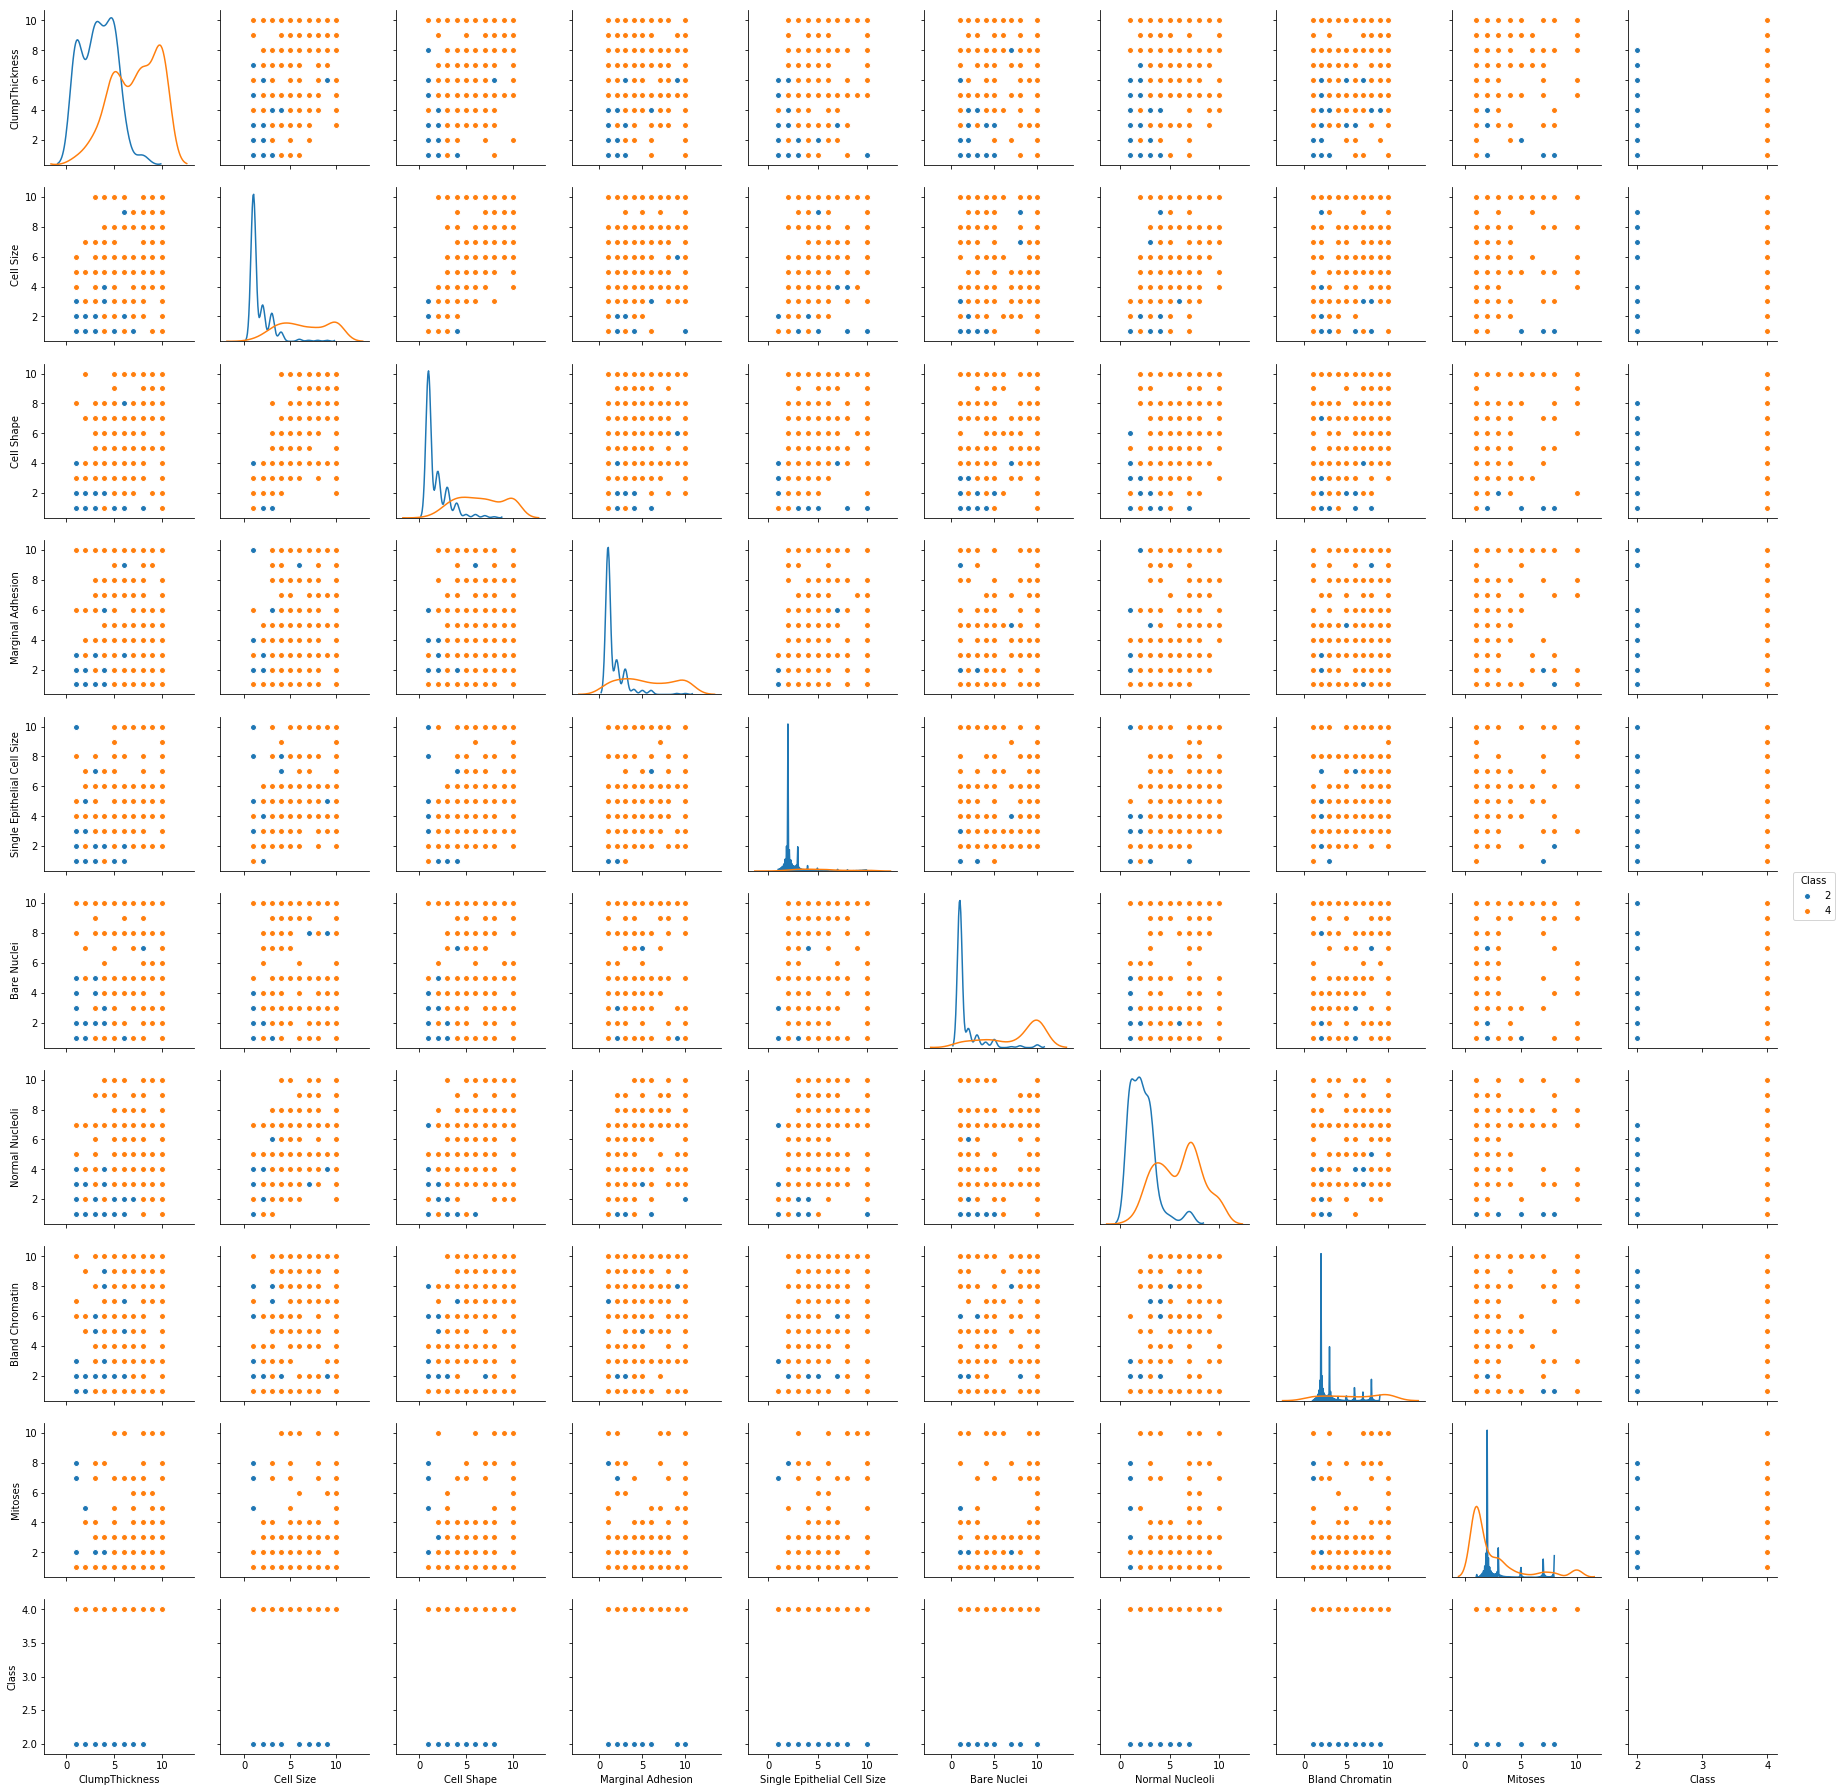

In [19]:
sns.pairplot(cancer_df, hue="Class", diag_kind='kde')

In [20]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [21]:
# We could see most of the outliers are now removed.

In [22]:
from scipy.stats import zscore
numeric_col = cancer_df.select_dtypes(include=['float64','int64']).columns
cancer_df_z = cancer_df
cancer_df_z[numeric_col] = cancer_df[numeric_col].apply(zscore)
cancer_df_z.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,-0.128603,-0.993808,-1.050717,-0.864384,-0.763716,-0.965209,-0.453018,-0.838199,-0.437224,-1.042477
1,-0.128603,-0.066930,-0.089079,0.403749,1.279716,1.357731,-0.453018,-0.543086,-0.437224,-1.042477
2,-0.828263,-0.993808,-1.050717,-0.864384,-0.763716,-0.707105,-0.453018,-0.838199,-0.437224,-1.042477
3,0.221227,1.168907,1.193104,-0.864384,-0.355030,-0.190896,-0.453018,0.932480,-0.437224,-1.042477
4,-0.478433,-0.993808,-1.050717,-0.230317,-0.763716,-0.965209,-0.453018,-0.838199,-0.437224,-1.042477


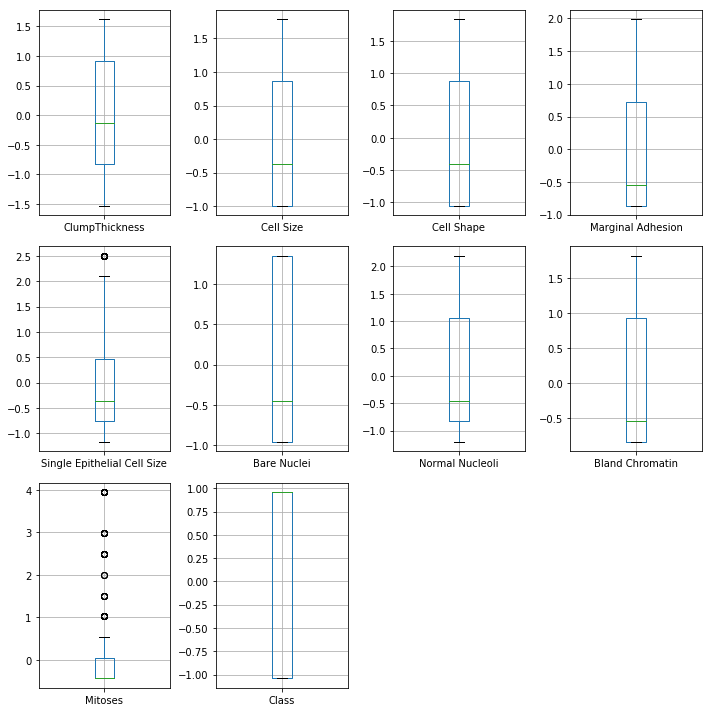

In [23]:
fig, axes = plt.subplots(3,4,figsize=(10,10)) # create figure and axes

for i,el in enumerate(list(cancer_df_z.columns.values)[:]):
    a = cancer_df_z.boxplot(el, ax=axes.flatten()[i])

fig.delaxes(axes[2,2]) # remove empty subplot
fig.delaxes(axes[2,3]) # remove empty subplot
plt.tight_layout() 
plt.show()

In [24]:
#Removing outliers which are > 2sigma
cancer_df_z_wo = cancer_df_z[cancer_df_z[cancer_df_z.iloc[:,0:10]>2].isnull()].dropna()
cancer_df_z_wo.shape

(394, 10)

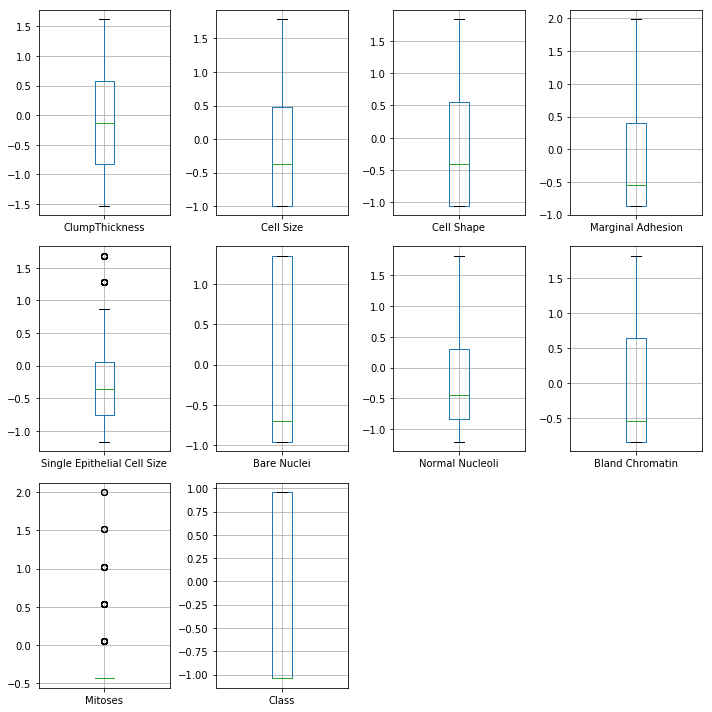

In [25]:
fig, axes = plt.subplots(3,4,figsize=(10,10)) # create figure and axes

for i,el in enumerate(list(cancer_df_z_wo.columns.values)[:]):
    a = cancer_df_z_wo.boxplot(el, ax=axes.flatten()[i])

fig.delaxes(axes[2,2]) # remove empty subplot
fig.delaxes(axes[2,3]) # remove empty subplot
plt.tight_layout() 
plt.show()

# Q6 Create a covariance matrix for identifying Principal components

In [26]:
# PCA
# Step 1 - Create covariance matrix
cancer_df_z1 = cancer_df_z_wo.drop('Class', axis=1)
cancer_df_z1.shape

(394, 9)

In [27]:
cancer_cov = np.cov(cancer_df_z1.T)
cancer_cov

array([[0.94219563, 0.48782213, 0.49663789, 0.31240052, 0.2756233 ,
        0.48418448, 0.42167257, 0.40047756, 0.13874815],
       [0.48782213, 0.83556758, 0.72170776, 0.50016216, 0.4446012 ,
        0.53317185, 0.54646941, 0.58088505, 0.15478332],
       [0.49663789, 0.72170776, 0.83457075, 0.47497674, 0.41743595,
        0.53776126, 0.53215928, 0.56527303, 0.13429661],
       [0.31240052, 0.50016216, 0.47497674, 0.82916268, 0.32985403,
        0.54646975, 0.44366033, 0.42374743, 0.14112086],
       [0.2756233 , 0.4446012 , 0.41743595, 0.32985403, 0.53245819,
        0.35653338, 0.35090661, 0.40884316, 0.11380951],
       [0.48418448, 0.53317185, 0.53776126, 0.54646975, 0.35653338,
        0.9682749 , 0.52667241, 0.42520375, 0.15920859],
       [0.42167257, 0.54646941, 0.53215928, 0.44366033, 0.35090661,
        0.52667241, 0.76712632, 0.51636991, 0.11651562],
       [0.40047756, 0.58088505, 0.56527303, 0.42374743, 0.40884316,
        0.42520375, 0.51636991, 0.89745875, 0.14611807],


# Q7 Identify eigen values and eigen vector

In [28]:
# Step 2- Get eigen values and eigen vector

In [29]:
eig_vals, eig_vecs = np.linalg.eig(cancer_cov)
print("Eigen Value = ",eig_vals,"\n\nEigen Vector = ", eig_vecs)

Eigen Value =  [4.18580047 0.60668797 0.57724635 0.10750318 0.15900884 0.2342691
 0.32158749 0.33909398 0.28014956] 

Eigen Vector =  [[ 0.32460661  0.86373493 -0.11385777  0.01678666 -0.09093433  0.11558901
   0.33693075  0.01128744 -0.00821728]
 [ 0.39981149 -0.08546152 -0.19937082  0.72239835  0.18822196 -0.12982851
  -0.18975946  0.42363705 -0.05898359]
 [ 0.39395991 -0.03109196 -0.19810558 -0.64744715 -0.0876206  -0.32448354
  -0.26377074  0.44209278 -0.08606554]
 [ 0.32831561 -0.33905446  0.48644814 -0.03056859 -0.09629744  0.04372361
   0.66568515  0.2325454  -0.17687756]
 [ 0.26150881 -0.18716051 -0.13805685 -0.07797654 -0.20290641  0.77160598
  -0.12723389  0.11613891  0.45301274]
 [ 0.37553225  0.12528544  0.64724768  0.05958014 -0.0675271  -0.22508215
  -0.38973607 -0.28950534  0.36037523]
 [ 0.35037797 -0.06551917 -0.00348108 -0.05149633  0.11310088  0.32916375
  -0.25392422 -0.42008437 -0.71287415]
 [ 0.36062668 -0.27483107 -0.48207193  0.0211669  -0.0891469  -0.31555995
 

# Q8 Find variance and cumulative variance by each eigen vector

In [30]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var = np.cumsum(var_exp)
print("Cumulative Variance", cum_var)

Cumulative Variance [ 61.45334402  70.36036307  78.83513844  83.81350738  88.53485686
  92.64784009  96.08723474  98.42170452 100.        ]


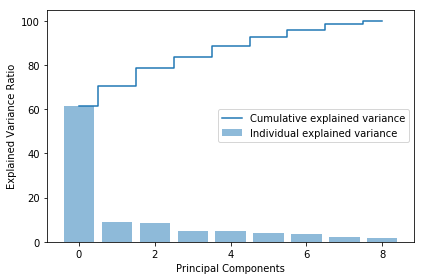

In [31]:
plt.figure(figsize=(6 , 4))
plt.bar(range(9), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(9), cum_var, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [32]:
from sklearn.decomposition import PCA

In [33]:
cancer_centred = cancer_df_z1 - cancer_df_z1.mean(axis=0)

In [34]:
pca = PCA(n_components=9)
pca.fit(cancer_centred)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [35]:
# Eigen Vector
pca.components_

array([[ 0.32460661,  0.39981149,  0.39395991,  0.32831561,  0.26150881,
         0.37553225,  0.35037797,  0.36062668,  0.09776561],
       [-0.86373493,  0.08546152,  0.03109196,  0.33905446,  0.18716051,
        -0.12528544,  0.06551917,  0.27483107, -0.01353826],
       [ 0.11385777,  0.19937082,  0.19810558, -0.48644814,  0.13805685,
        -0.64724768,  0.00348108,  0.48207193, -0.03186468],
       [ 0.01128744,  0.42363705,  0.44209278,  0.2325454 ,  0.11613891,
        -0.28950534, -0.42008437, -0.54485167, -0.01565424],
       [-0.33693075,  0.18975946,  0.26377074, -0.66568515,  0.12723389,
         0.38973607,  0.25392422, -0.30186397, -0.11863918],
       [-0.00821728, -0.05898359, -0.08606554, -0.17687756,  0.45301274,
         0.36037523, -0.71287415,  0.25703004,  0.2200355 ],
       [ 0.11558901, -0.12982851, -0.32448354,  0.04372361,  0.77160598,
        -0.22508215,  0.32916375, -0.31555995,  0.09283211],
       [-0.09093433,  0.18822196, -0.0876206 , -0.09629744, -0

In [36]:
# Eigen Value
pca.explained_variance_ratio_

array([0.61453344, 0.08907019, 0.08474775, 0.04978369, 0.04721349,
       0.04112983, 0.03439395, 0.0233447 , 0.01578295])

In [37]:
pca.transform(cancer_df_z1)

array([[-2.20274747, -0.57573166,  0.12712242, ...,  0.12006574,
        -0.16492384,  0.08700998],
       [ 0.47616375,  0.13587146, -1.19360263, ...,  0.70388893,
        -0.79463771,  0.08051867],
       [-2.3329351 , -0.00374776, -0.11959684, ..., -0.01890197,
        -0.1187298 ,  0.09064293],
       ...,
       [-2.51482745, -0.00280658,  0.03061409, ..., -0.04014815,
         0.31121072, -0.00863366],
       [-2.49128273,  0.02314671, -0.06580991, ...,  0.04727861,
        -0.28726797,  0.09775573],
       [ 2.65045762,  1.1317098 ,  2.16402147, ...,  0.14123225,
         0.02770696, -0.06468056]])

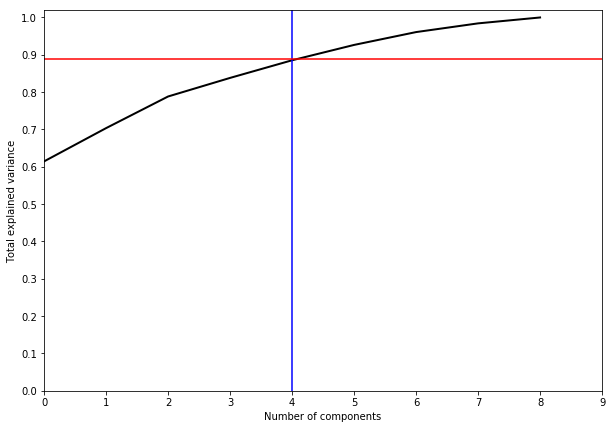

In [38]:
plt.figure(figsize=(10,7))

plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.xlim(0, 9)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axvline(4, c='b')
plt.axhline(0.89, c='r')

plt.show()

# Q10 Find correlation between components and features

In [39]:
pca = PCA(n_components=4)
cancer_pca = pca.fit_transform(cancer_df_z1)

In [40]:
cancer_new = pd.DataFrame(cancer_pca, columns=["PC1","PC2","PC3","PC4"])
cancer_new.shape

(394, 4)

In [41]:
cancer_df_z1 = cancer_df_z1.reset_index(drop=True)
new_df = cancer_df_z1.copy()
new_df["PC1"] = cancer_new["PC1"]
new_df["PC2"] = cancer_new["PC2"]
new_df["PC3"] = cancer_new["PC3"]
new_df["PC4"] = cancer_new["PC4"]
new_df.head(20)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,PC1,PC2,PC3,PC4
0,-0.128603,-0.993808,-1.050717,-0.864384,-0.763716,-0.965209,-0.453018,-0.838199,-0.437224,-1.763433,-0.527209,0.154374,-0.196604
1,-0.128603,-0.066930,-0.089079,0.403749,1.279716,1.357731,-0.453018,-0.543086,-0.437224,0.915479,0.184394,-1.166351,0.320112
2,-0.828263,-0.993808,-1.050717,-0.864384,-0.763716,-0.707105,-0.453018,-0.838199,-0.437224,-1.893620,0.044775,-0.092346,-0.279224
3,0.221227,1.168907,1.193104,-0.864384,-0.355030,-0.190896,-0.453018,0.932480,-0.437224,1.134987,-0.108658,1.478744,0.574067
4,-0.478433,-0.993808,-1.050717,-0.230317,-0.763716,-0.965209,-0.453018,-0.838199,-0.437224,-1.668816,-0.010066,-0.193898,-0.053104
5,0.920887,1.786826,1.834195,1.354849,1.279716,1.357731,1.817868,0.932480,-0.437224,4.395053,0.372929,-0.039689,0.430790
6,-1.527922,-0.993808,-1.050717,-0.864384,-0.763716,1.357731,-0.453018,-0.838199,-0.437224,-1.345322,0.390402,-1.508468,-0.884903
7,-1.178092,-0.993808,-0.730171,-0.864384,-0.763716,-0.965209,-0.453018,-0.838199,-0.437224,-1.977822,0.389238,0.098383,-0.066739
8,-1.178092,-0.993808,-1.050717,-0.864384,-0.763716,-0.965209,-1.209979,-0.838199,1.512157,-2.178744,0.303285,-0.029870,0.079021
9,-0.478433,-0.684849,-1.050717,-0.864384,-0.763716,-0.965209,-0.831499,-0.838199,-0.437224,-1.886076,-0.223442,0.174823,0.089328


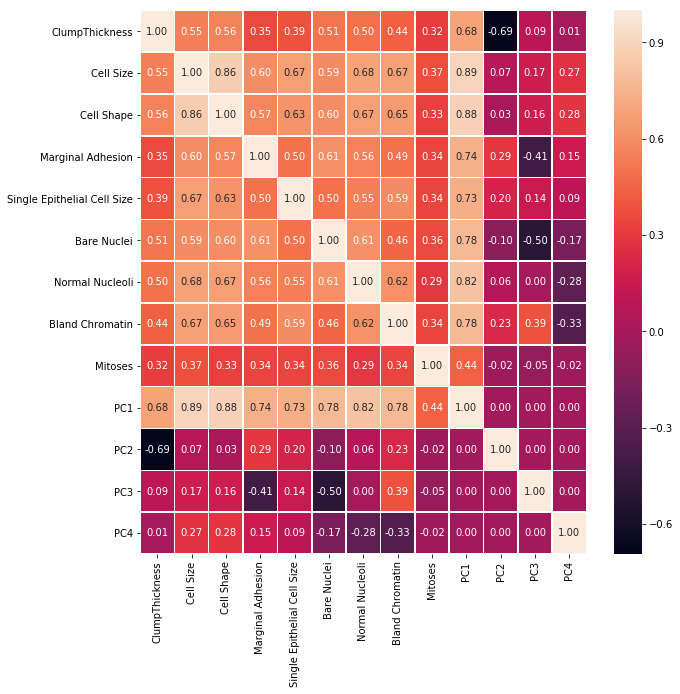

In [42]:
# Check for correlation of variable
new_df_corr = new_df.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(new_df_corr,annot=True, linewidth=.5, fmt='.2f' , ax=ax)

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [43]:
jokes_df = pd.read_csv("jokes.csv")
jokes_df.head(10)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [44]:
jokes_df.shape

(24983, 101)

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [45]:
ratings = jokes_df.iloc[0:200,1:]
print(ratings.head(10))
print(ratings.shape)

   Joke1  Joke2  Joke3  Joke4  Joke5  Joke6  Joke7  Joke8  Joke9  Joke10  \
0  -7.82   8.79  -9.66  -8.16  -7.52  -8.50  -9.85   4.17  -8.98   -4.76   
1   4.08  -0.29   6.36   4.37  -2.38  -9.66  -0.73  -5.34   8.88    9.22   
2  99.00  99.00  99.00  99.00   9.03   9.27   9.03   9.27  99.00   99.00   
3  99.00   8.35  99.00  99.00   1.80   8.16  -2.82   6.21  99.00    1.84   
4   8.50   4.61  -4.17  -5.39   1.36   1.60   7.04   4.61  -0.44    5.73   
5  -6.17  -3.54   0.44  -8.50  -7.09  -4.32  -8.69  -0.87  -6.65   -1.80   
6  99.00  99.00  99.00  99.00   8.59  -9.85   7.72   8.79  99.00   99.00   
7   6.84   3.16   9.17  -6.21  -8.16  -1.70   9.27   1.41  -5.19   -4.42   
8  -3.79  -3.54  -9.42  -6.89  -8.74  -0.29  -5.29  -8.93  -7.86   -1.60   
9   3.01   5.15   5.15   3.01   6.41   5.15   8.93   2.52   3.01    8.16   

    ...     Joke91  Joke92  Joke93  Joke94  Joke95  Joke96  Joke97  Joke98  \
0   ...       2.82   99.00   99.00   99.00   99.00   99.00   -5.63   99.00   
1   ...

# Q22 Change the column indices from 0 to 99

In [46]:
ratings.columns = np.arange(0,100,1)
ratings.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [47]:
ratings_new = ratings.replace("99.00","0")
ratings_new.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#print(scaler.fit(ratings_new))
#print(scaler.transform(ratings_new))
ratings_diff = pd.DataFrame(scaler.fit_transform(ratings_new),index=ratings_new.index,columns=ratings_new.columns)

ratings_diff.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.834017,-0.263026,-0.942683,-1.066125,-1.380394,-0.883915,-1.785253,0.877475,-1.031886,-0.593006,...,-1.397875,0.740224,0.773171,0.772626,0.740124,0.740442,-1.393526,0.707782,0.789401,0.708077
1,-0.569744,-0.499046,-0.603680,-0.816405,-0.432101,-0.909860,-0.160595,-1.083559,-0.667499,-0.207319,...,-1.397875,-1.460133,-1.361107,-1.157292,-1.383886,-1.416016,-1.210820,-1.403709,-1.358070,-1.416331
2,1.538226,2.081847,1.356697,1.069553,1.672963,-0.486467,1.578074,1.929134,1.171165,2.269575,...,0.700489,0.740224,0.773171,-1.131458,0.740124,0.740442,0.806302,0.707782,0.789401,0.708077
3,1.538226,-0.274463,1.356697,1.069553,0.339079,-0.511294,-0.532913,1.298139,1.171165,-0.410922,...,0.700489,0.740224,0.773171,-1.312507,0.740124,0.740442,0.806302,0.707782,0.789401,0.708077
4,-0.471585,-0.371678,-0.826508,-1.010920,0.257903,-0.658016,1.223570,0.968206,-0.857649,-0.303603,...,-1.346169,-1.237240,-1.263088,-1.213830,-1.257118,-1.337339,-1.209769,-1.270805,-1.230868,-1.404834
5,-0.797374,-0.583525,-0.728955,-1.072902,-1.301062,-0.790424,-1.578608,-0.161811,-0.984348,-0.511344,...,-1.536632,-1.501198,-1.369490,-1.386409,-1.426499,-1.441815,-1.274105,-1.605313,-1.373243,-1.514384
6,1.538226,2.081847,1.356697,1.069553,1.591786,-0.914110,1.344707,1.830154,1.171165,2.269575,...,0.700489,0.740224,0.773171,0.772626,0.740124,-1.320709,0.806302,0.707782,0.789401,0.708077
7,-0.508450,-0.409369,-0.544217,-1.027262,-1.498469,-0.731825,1.620828,0.308342,-0.954561,-0.583626,...,-1.301662,-1.379062,-1.357023,-1.444006,-1.447485,-1.441815,-1.230163,-1.412056,-1.241052,-1.439543
8,-0.744519,-0.583525,-0.937605,-1.040815,-1.605475,-0.700288,-0.972924,-1.823844,-1.009035,-0.505827,...,-1.364059,-1.361493,-1.265238,-1.329871,-1.386028,-1.376571,-1.281253,-1.417192,-1.338948,-1.546924
9,-0.593506,-0.357642,-0.629285,-0.843509,1.189591,-0.578616,1.560259,0.537233,-0.787261,-0.236563,...,0.700489,-1.260736,0.773171,0.772626,0.740124,0.740442,0.806302,0.707782,0.789401,0.708077


### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [49]:
ratings_diff.mean().sort_values(ascending=False).head(10)

87    2.831069e-16
84    2.642331e-16
3     2.536860e-16
95    2.342571e-16
72    2.153833e-16
70    1.743050e-16
93    1.676437e-16
83    1.665335e-16
96    1.476597e-16
63    1.426637e-16
dtype: float64

In [50]:
# Highest rated jokes ID's are
pd.DataFrame(ratings_diff.mean().sort_values(ascending=False)).iloc[0:10,:0]

""
87
84
3
95
72
70
93
83
96
63
